<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyLSYSTEM</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>LINDENMAYER</b> systems</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyLSYSTEM.png"></td>
</tr>
</table>

# L-systems: Drawing
----
In this notebook, we introduce the translation of the **L system** alphabet into a graphical representation.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import libLSYSTEM

We then create a function `lsystemCreate`, which takes a `word` and a set of `rules`,
then applies the `rules` to each letter of the `word` and returns the updated word
as `newword`.


----
## Drawing L systems

The character sequences resulting from an L system iteration can be used to graphically
illustrate the sequence. Often, the following **notation** for the characters is chosen
for plotting:

|Character |  Meaning                                                  |
|----------|:----------------------------------------------------------|
|   F      | Move forward by line length drawing a line 
|   f      | Move forward by line length without drawing a line 
|   +      | Turn left by turning angle
|   -      | Turn right by turning angle
|   |      | Reverse direction (ie: turn by 180 degrees)
|   [      | Push current drawing state onto stack
|   ]      | Pop current drawing state from the stack
|   #      | Increment the line width by line width increment
|   !      | Decrement the line width by line width increment
|   @      | Draw a dot with line width radius
|   {      | Open a polygon
|   }      | Close a polygon and fill it with fill colour
|   >      | Multiply the line length by the line length scale factor
|   <      | Divide the line length by the line length scale factor
|   &      | Swap the meaning of + and -
|   (      | Decrement turning angle by turning angle increment
|   )      | Increment turning angle by turning angle increment

----
## Example: Linear path
We define a starting word, and a simple set of rules, and perform one interation.

In [20]:
word = 'X'
print(0,word)
rules = {'X':'FFF-F-F+FF' 
        }

iter=1
word = libLSYSTEM.lsystemIterate(word,rules,iter=iter)
print(iter,word)

0 X
1 FFF-F-F+FF


The resulting word `FFF-F-F+FF` means, in plotting terms,
- move forward three times
- turn right
- move forward one time
- turn right
- move forward one time
- turn left
- move forward two times

We define a length `length` and an angle `angle` and create a plotting function ...

In [21]:
def lsystemPlot(word,length=0.2,angle=90.,x=0,y=0,d=90,showDot=False,linewidth=1):
    """
    L-system
    Plot final word following rules defined for moving the cursor
    Input:
    word   - input string
    length - length of forward step
    angle  - angle to turn
    x,y,d  - initial position and view angle
    Output:
    (plot)
    """
    d2r = np.pi / 180.
    ax = plt.axes()
    #ax.set_xlim([-10,10])
    #ax.set_ylim([-10,10])
    ax.grid()
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.set_aspect('equal', 'box')
    # define empty stack
    stack = []
    # loop over letters in word
    for letter in word:
        if letter in ["F", "G", "R", "L"]:
            xfrom=x;yfrom=y;
            x = xfrom + length*np.cos(d*d2r)
            y = yfrom + length*np.sin(d*d2r)
            ax.plot([xfrom,x],[yfrom,y],lw=linewidth,color='brown')
            if (showDot): ax.plot(x,y,lw=0,marker='.',markersize=10,color='black')
        elif letter == "f":
            x = xfrom + length*np.cos(d*d2r)
            y = yfrom + length*np.sin(d*d2r)
        elif letter == "+":
            d += angle
        elif letter == "-":
            d -= angle
        elif letter == "[":
            stack.append([x,y,d])
        elif letter == "]":
            [x,y,d] = stack.pop()
    return

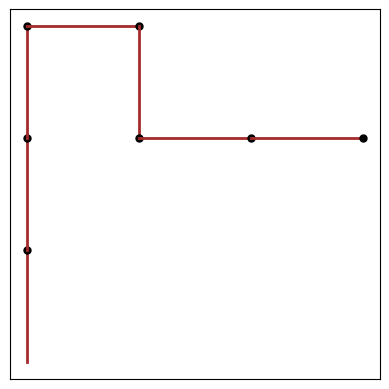

In [22]:
lsystemPlot(word,showDot=True,linewidth=2)

----
## Example: Branching path

0 X
1 FFF-F-F[F+F]+FF


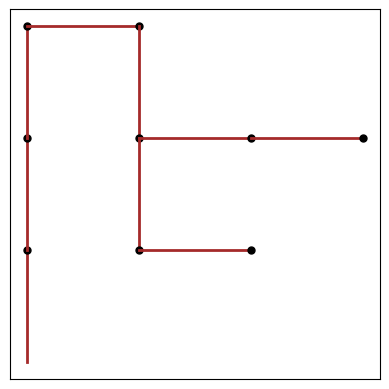

In [29]:
word = 'X'
print(0,word)
rules = {'X':'FFF-F-F[F+F]+FF' 
        }

word = libLSYSTEM.lsystemIterate(word,rules,iter=1)
print(iter,word)

lsystemPlot(word,angle=90,showDot=True,linewidth=2)

0 X
1 F[+F][-F[-F]F]F[+F][-F]


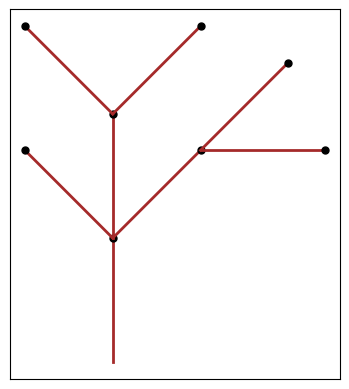

In [30]:
word = 'X'
print(0,word)
rules = {'X':'F[+F][-F[-F]F]F[+F][-F]' 
        }

word = libLSYSTEM.lsystemIterate(word,rules,iter=1)
print(iter,word)

lsystemPlot(word,angle=45,showDot=True,linewidth=2)

Now we are ready to create more complicated L-systems!